In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Assuma que duas populações de bactérias y1 e y2 estão em competição em um ambiente confinado.
## A taxa de crescimento dessas bactérias é dada pelo sistema (7.3) da imagem, onde C1 e C2 representam a taxa de crescimento das duas populações. Os coeficientes d1 e d2 governam o tipo de interação entre as duas populações enquanto b1 e b2 estão relacionados a quantidade de nutrientes disponíveis.

### Considere C1 = C2 = d1 = d2 = 1 e b1 = b2 = 0 e resolva o sistema de EDOs no intervalo [0,10] utilizando 100 espaçamentos (n = 100) com o método de Euler explixicot e Runge-Kutta de quarta ordem para:

#### a) y0 = (1.2,1.2)
#### b) y0 = (2, 2)

### plote os resultados obtidos no intervalo

In [2]:
def euler_ex(f, a, b, y0, n):
    h = (b-a)/n
    y = np.zeros((n+1, len(y0))) #n sub-espaços -> (linha) n+1 soluções (vetor para armazenar as soluções) para cada equação (coluna)
    
    y[0] = y0
    
    for i in range(n):
        xi = a + h*i
        y[i+1] = y[i] + h * f(xi, y[i])
        
    return y

In [3]:
def rk4(f, a, b, y0, n):
    h = (b-a)/n
    y = np.zeros((n+1, len(y0)))
    
    y[0] = y0
    
    for i in range(n):
        xi = a + i*h
        k1 = f(xi, y[i])
        k2 = f(xi + h/2, y[i] + h/2 * k1)
        k3 = f(xi + h/2, y[i] + h/2 * k2)
        k4 = f(xi + h, y[i] + h * k3)
        y[i+1] = y[i] + h/6 * (k1 + 2*(k2+k3) + k4)
        
    return y

In [4]:
def f(x, y):
    return np.array([y[0]*(1 - y[1]), -y[1]*(1 - y[0])])

n = 100
a = 0
b = 10

# a) y0 = (1.2,1.2)

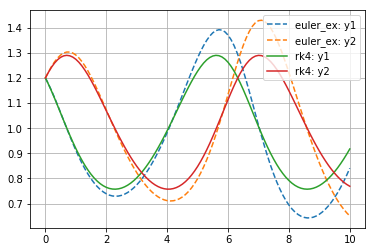

In [7]:
y0 = np.array([1.2, 1.2])

ye = euler_ex(f, a, b, y0, n)
y4 = rk4(f, a, b, y0, n)

y = np.linspace(a, b, n+1)
plt.plot(y, ye, '--')
plt.plot(y, y4)
plt.legend(['euler_ex: y1', 'euler_ex: y2', 'rk4: y1', 'rk4: y2'])
plt.grid()

# b) y0 = (2, 2)

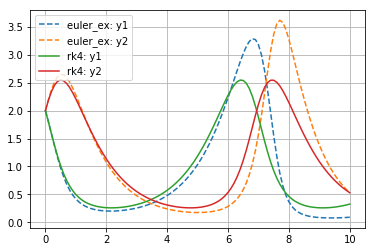

In [6]:
y0 = np.array([2, 2])

ye = euler_ex(f, a, b, y0, n)
y4 = rk4(f, a, b, y0, n)

y = np.linspace(a, b, n+1)
plt.plot(y, ye, '--')
plt.plot(y, y4)
plt.legend(['euler_ex: y1', 'euler_ex: y2', 'rk4: y1', 'rk4: y2'])
plt.grid()

In [7]:
#Observa-se que o método de Euler Explícito e o método de Runge-Kutta de quarta ordem apresentam uma diferença na estimação das populações de bactérias y1 e y2 por conta da precisão de cada método.
#Além disso, em alguns intervalos específicos a quantidade de bactérias da população y1 é maior, menor ou igual as da população y2.